In [1]:
# import libraries
import matplotlib.pyplot as plt
from openpile.construct import Pile, SoilProfile, Model, Layer
from openpile.soilmodels import API_sand, API_clay
from openpile.utils.py_curves import api_sand
from openpile.analyses import simple_winkler_analysis

In [2]:
# create pile
p = Pile.create(name = "WTG01",
        kind='Circular',
        material='Steel',
        top_elevation = 0,
        pile_sections={
            'length':[10,20],
            'diameter':[7.5,7.5],
            'wall thickness':[0.07, 0.08],
        } 
    )

# Create Soil Profile
sp = SoilProfile(
    name="BH01",
    top_elevation=0,
    water_elevation=0,
    layers=[
        Layer(
            name='Layer0',
            top=0,
            bottom=-40,
            weight=18,
            lateral_model= API_sand(phi=30, Neq=100)
        ),
    ]
)

# Create Model 
M = Model.create(name="", pile=p, soil=sp)


In [11]:
# create point load
M.set_support(elevation=-30, Tx = True)
M.set_support(elevation=0, Rz = True)
M.set_pointdisplacement(elevation=0, Ty=0.1)
M.set_pointload(elevation=0,Px=-20000)


In [12]:
result = simple_winkler_analysis(model=M)

Converged at iteration no. 2


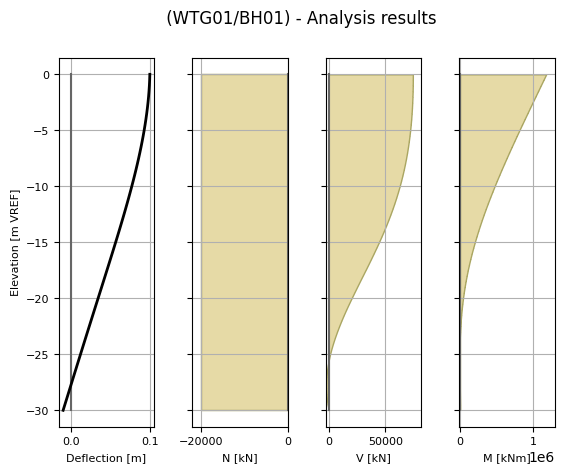

In [13]:
result.plot()

In [6]:
from openpile.construct import Layer
from openpile.soilmodels import API_clay
    
# Create a layer
layer1 = Layer(name='Soft Clay',
               top=0,
               bottom=-10,
               weight=18,
               lateral_model=API_clay(Su=[30,35], eps50=[0.01, 0.02], Neq=100), )

print(layer1)

Name: Soft Clay
Elevation: (0.0) - (-10.0) m
Weight: 18.0 kN/m3
Lateral model: 	API clay
	Su = 30.0-35.0 kPa
	eps50 = 0.01-0.02
	Cyclic, N = 100 cycles
Axial model: None


In [7]:
M.global_restrained

,x [m],y [m],Tx,Ty,Rz
Node no.,,,,,
0,0.0,0.0,False,True,True
1,-0.5,0.0,False,False,False
2,-1.0,0.0,False,False,False
3,-1.5,0.0,False,False,False
4,-2.0,0.0,False,False,False
...,...,...,...,...,...
56,-28.0,0.0,False,False,False
57,-28.5,0.0,False,False,False
58,-29.0,0.0,False,False,False
